# Part 3 : Restoration

We are going to look at image restoration. We will look at several type of noise and ways to remove this noise. We first define some helper functions.

(600, 800)

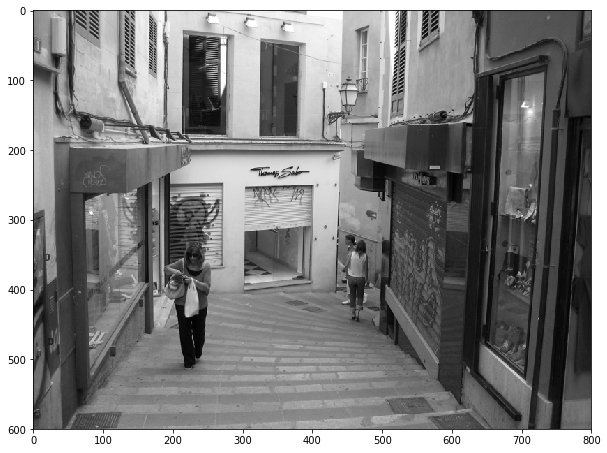

In [15]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import *

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    plt.figure(figsize=(10, 10))
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

file_dir = 'images/'
file_name = 'palma'
file_ext = '.png'
img_gray,_ = read_image(file_dir+file_name+file_ext)
display_image(img_gray)
img_gray.shape

We will look at the following noise types :

- Gaussian noise
- Impulse (salt-and-pepper, 0 or 1) noise
- Missing pixels

Fill in the following functions to add this noise to a gray-level image. Do not forget to clip the pixe values to the range $(0,1)$ (np.clip).

In [16]:
def add_gaussian_noise(img_in,sigma_noise = 0.01):
    mean = 0
    sigma = 1
    img_out = img_in + sigma_noise * np.random.normal(mean, sigma, img_in.shape)
    img_out = np.clip(img_out, 0, 1)

    return img_out

# we define the impulse probability p as the probability of a pixel not being affected
def add_impulse_noise2(img_in,p=0.9):
    np.random.binomial(1, 1-p, img_in.shape)  
    print(np.random.binomial(1, 1-p, img_in.shape))
    pix_to_change =  np.random.binomial(1, 1-p, img_in.shape)
    print('shape ',img_in.shape)
    mask = pix_to_change == 1
    print(mask[:,0])
    print('img mask' ,img_in[mask].shape) #toutes les pixels qui doivent changer
    img_in[mask] = np.random.binomial(1, 1-1/2, img_in[mask].shape)
   # noisy_img= noisy_img + np.random.binomial(1, 1-1/2, img_in.shape)
    img_in = np.clip(img_in, 0, 1)
    return img_in



def add_impulse_noise(img_in,p=0.9):
    rnd = np.random.binomial(1, 1-p, img_in.shape)
    img_out = img_in.copy()
    img_out[rnd == 1] = np.random.binomial(1, 0.5, img_out[rnd == 1].shape)
    img_out = np.clip(img_out, 0, 1)

    return img_out



def add_missing_pixels_noise(img_in,p=0.9):
    noisy_img = img_in - np.random.binomial(1, 1-p, img_in.shape)
    img_out = np.clip(noisy_img, 0, 1)
    return img_out

    return img_out

Add the different noises to the input image, and display (or write) the results. Use the following parameters :

- sigma_noise=0.05 for the gaussian noise
- $p=0.9$ (the probability of a pixel __not__ being affected, for the impulse noise and missing pixels

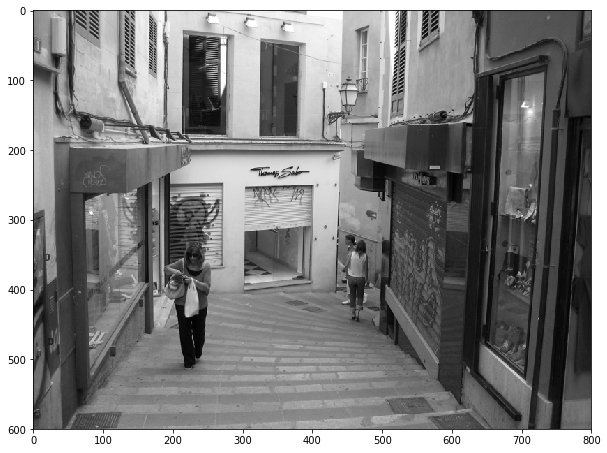

In [17]:
display_image(img_gray)

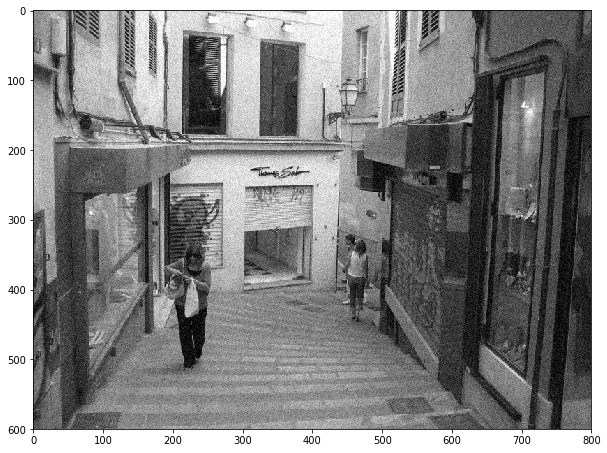

In [18]:

sigma_noise = 0.05
img_gray_gaussian = add_gaussian_noise(img_gray, sigma_noise)
display_image(img_gray_gaussian)
write_image(img_gray_gaussian,file_name+'_gaussian_noise.png')


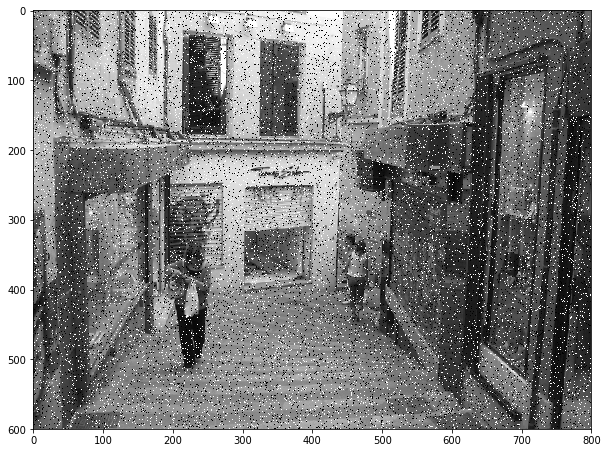

In [19]:
img_gray_impulse = add_impulse_noise(img_gray, 0.9)
write_image(img_gray_impulse,file_name+'_impulse_noise.png')
display_image(img_gray_impulse)


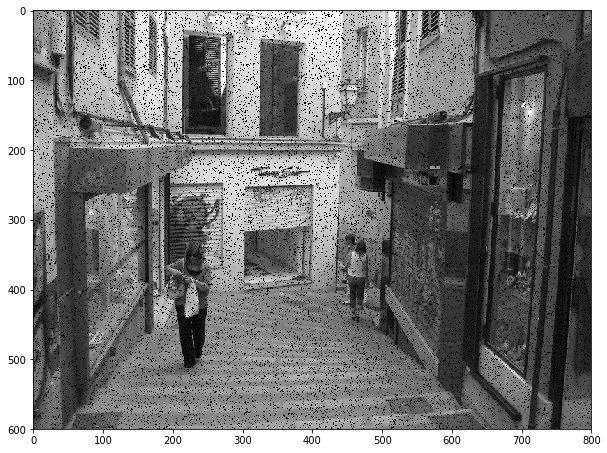

In [20]:
img_gray_missing = add_missing_pixels_noise(img_gray, 0.9)
write_image(img_gray_missing,file_name+'_missing_pixels.png')
display_image(img_gray_missing)

__Question__ For each type of noise, propose a restoration filter (see course slides).

__Answer__ 
According to the course, **Gaussian filter** can be use to restore the gaussian noise.
The **Median filter** will be rather used to help with the impulse noise and the mixing pixels.

Implement these restoration filters in appropriately named functions, and write the corresponding output images. Try to find the parameters which give the best results (visually).

__IMPORTANT NOTE__, you can use the filtering functions of the ``scipy.ndimage`` package, where the filtering is already implemented (do not re-implement the filters)

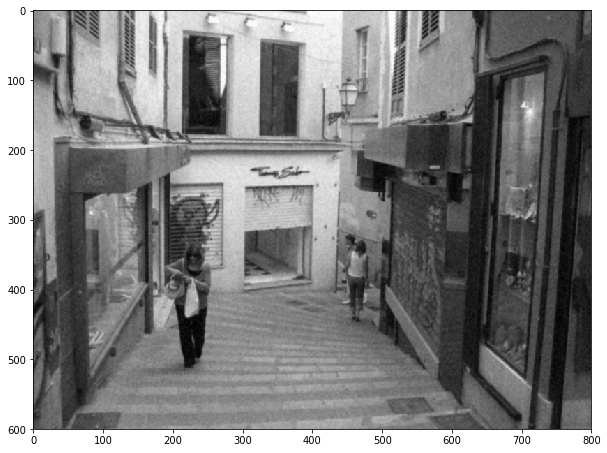

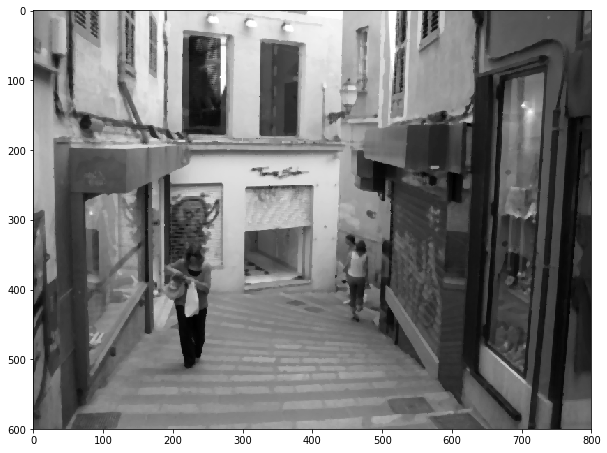

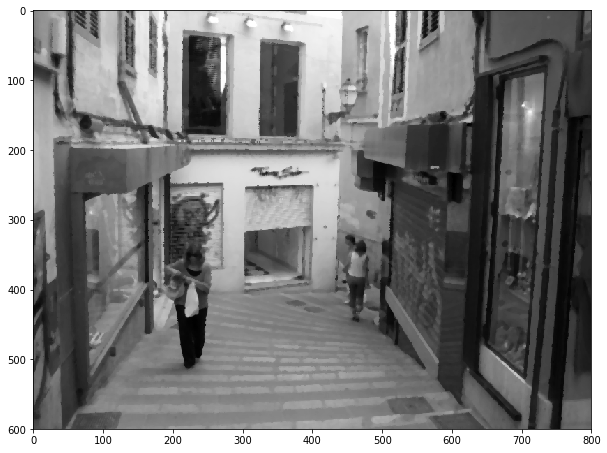

In [22]:
import scipy as sp
from scipy import ndimage

def gaussian_filter(img_in, sigma):
    img_out = sp.ndimage.gaussian_filter(img_in, sigma, order=0, output=None, mode='nearest', cval=0.0, truncate=4.0)
    return img_out

def median_filter(img_in):
    #print(img_in.shape)
    img_out = sp.ndimage.median_filter(img_in,size=5)
    return img_out


img_rest_gaussian = gaussian_filter(img_gray_gaussian, 0.90)
img_rest_impulse = median_filter(img_gray_impulse)
img_rest_missing = median_filter(img_gray_missing)

display_image(img_rest_gaussian)
display_image(img_rest_impulse)
display_image(img_rest_missing)

__Question__ Roughly speaking, what is the tradeoff which you are trying to achieve by tuning the parameters ?
By tuning the parameters we want to find a trade of for which the restored image is as close as possible to the original image while not adding too much noise to this image.

__Answer__

### Evaluation

A commonly used metric for denoising is the ''Peak Signal-to-Noise Ratio'' (PSNR). This is linked to the commonly known mean squared error. The mean squared error is defined, for a reference image $Y$ and a restored image $Y$, of size $m \times n$ as :

- MSE$(Y,I) = \frac{1}{mn} \sum_{x,y} \left( I_{x,y} - Y_{x,y}\right)^2 $

The PSNR is defined, in Decibels, as :

PSNR$(Y,I) = 10 * \log{\left( \frac{I_{max}^2}{MSE(Y,I)} \right)}$,

where $I_{max}$ is the maximum value of the image. For us (normalised to 1), this gives :

PSNR$(Y,I) = -10 * \log{ \left({MSE(Y,I)} \right)}$.

Implement this in a function, and create a code to plot the PSNR for several values of the paramter, __in the Gaussian case only (first filter)__. 

sigma =  0.0 psnr =  82.87974287568514
sigma =  0.1 psnr =  82.87974287568514
sigma =  0.2 psnr =  82.87987183469505
sigma =  0.3 psnr =  83.0123928575515
sigma =  0.4 psnr =  84.25270711916096
sigma =  0.5 psnr =  86.16785473093508
sigma =  0.6 psnr =  87.07521100430951
sigma =  0.7 psnr =  87.02953362415556
sigma =  0.8 psnr =  86.62418877373328
sigma =  0.9 psnr =  86.13031251166603


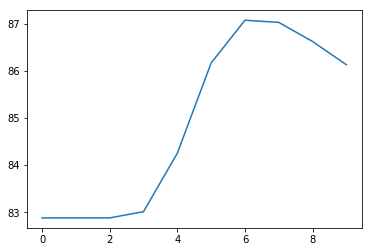

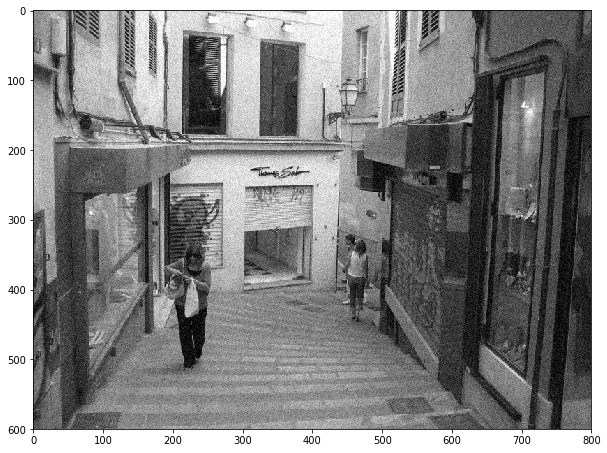

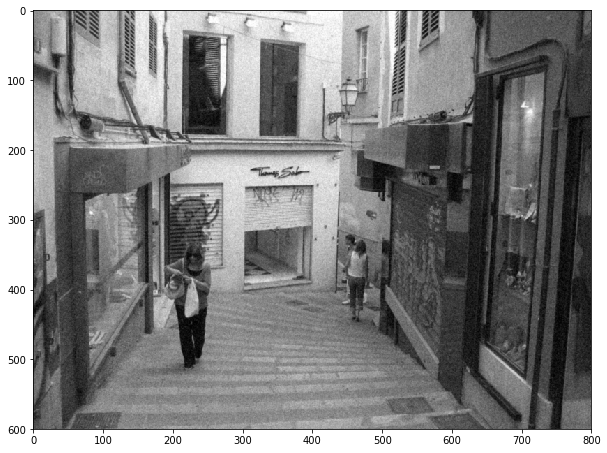

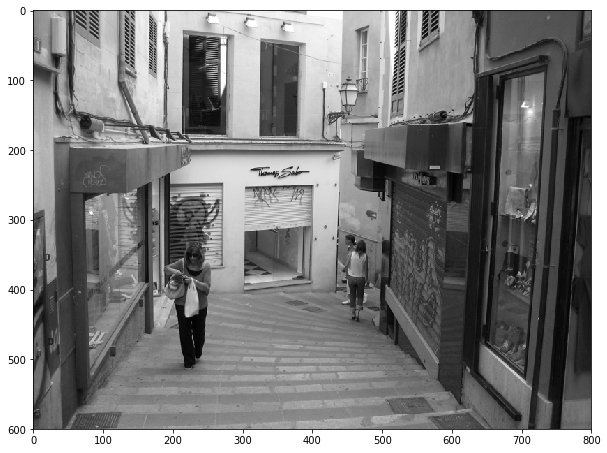

In [24]:
import math
def PSNR(img,img_ref):    
    mse = np.mean( (img - img_ref) ** 2 )/(img.shape[0]* img.shape[1])
    if mse == 0:
        return 10
    PIXEL_MAX = 1
    psnr = -10 * math.log10(mse)
    return psnr

psnr = []
for sigma in range(0, 10, 1):
    img_restored = gaussian_filter(img_gray_gaussian, sigma/10)
    psnr.append(PSNR(img_restored,img_gray))
    print("sigma = ", sigma/10, "psnr = ", psnr[-1])
plt.plot(psnr)

img_out = gaussian_filter(img_gray_gaussian, 0.6)
display_image(img_gray_gaussian)
display_image(img_out)
display_image(img_gray)